In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## overfiiting:震幅過大，任何點都通過

In [3]:
x= np.random.rand(6)
y= np.random.rand(6)

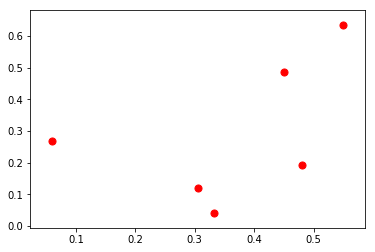

In [5]:
plt.scatter(x,y,c='r',s=50)

In [8]:
def myplot(n=1):
    plt.scatter(x,y,c='r',s=50)
    t = np.linspace(-0.2,1.2,1000)
    plt.plot(t,0.5*np.sin(n*t)+0.5)

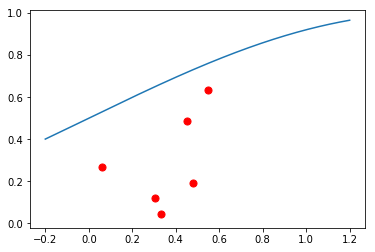

In [9]:
myplot(1)

In [10]:
from ipywidgets import interact

In [11]:
interact(myplot,n=(1,200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

## 線性回歸
$$ f(x) =1.2x + 0.8 + \varepsilon$$

In [16]:
x = np.linspace(0,5,200)
y = 1.2*x +0.8 + 0.3*np.random.randn(200)

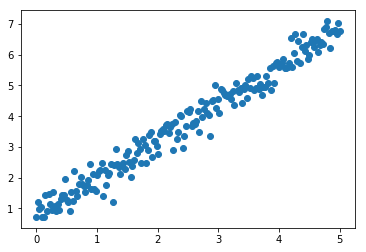

In [17]:
plt.scatter(x,y)

### 分訓練資料和測試資料

In [18]:
from sklearn.model_selection import train_test_split

### 小重點

機器學習(數據分析)，輸入資料是
$$[x_1,x_2,x_3....]$$
喜歡放成
$$[[x_1][x_2],[x_3],...]$$
意思說本來n維向量要變成nx1

In [19]:
x.shape

(200,)

In [20]:
x = x.reshape(200,1)

In [21]:
x

array([[0.        ],
       [0.02512563],
       [0.05025126],
       [0.07537688],
       [0.10050251],
       [0.12562814],
       [0.15075377],
       [0.1758794 ],
       [0.20100503],
       [0.22613065],
       [0.25125628],
       [0.27638191],
       [0.30150754],
       [0.32663317],
       [0.35175879],
       [0.37688442],
       [0.40201005],
       [0.42713568],
       [0.45226131],
       [0.47738693],
       [0.50251256],
       [0.52763819],
       [0.55276382],
       [0.57788945],
       [0.60301508],
       [0.6281407 ],
       [0.65326633],
       [0.67839196],
       [0.70351759],
       [0.72864322],
       [0.75376884],
       [0.77889447],
       [0.8040201 ],
       [0.82914573],
       [0.85427136],
       [0.87939698],
       [0.90452261],
       [0.92964824],
       [0.95477387],
       [0.9798995 ],
       [1.00502513],
       [1.03015075],
       [1.05527638],
       [1.08040201],
       [1.10552764],
       [1.13065327],
       [1.15577889],
       [1.180

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
len(x_train)

160

In [24]:
len(x_test)

40

### 準備做線性迴歸
所有函數學習，包括線性迴歸、機器學習、神經網路都是做三部曲:

    1.開一台函數學習機
    2.訓練
    3.預測

### step 1. 建函數學習機

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

### step 2. 學習(訓練)

In [27]:
#告訴機器輸入x會輸出對應的y
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### step 3. 預測

In [28]:
#輸入時一筆資料一個[]，因為可能要預測多個所以外面要在一個[]
model.predict([[10]])

array([12.82476035])

In [29]:
model.predict([[10],[5]])

array([12.82476035,  6.82290745])

In [32]:
y_predict = model.predict(x_test)

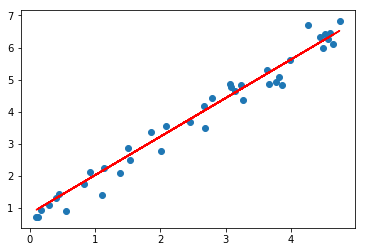

In [33]:
#ravel:拉平
plt.scatter(x_test.ravel(),y_test)
plt.plot(x_test.ravel(),y_predict,'r')

## 房價預測

In [34]:
from sklearn.datasets import load_boston

In [36]:
boston_dataset = load_boston()

In [40]:
#看dataset資料
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
len(boston_dataset.feature_names)

13

In [43]:
#前三筆資料
boston_dataset.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [45]:
#將資料輸成dataframe格式
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [46]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
boston['MEDV'] = boston_dataset.target

In [49]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
#畫圖
import seaborn as sns

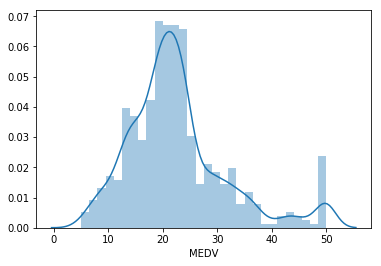

In [51]:
sns.distplot(boston.MEDV,bins=30)

## 準備訓練資料

In [52]:
#取CRIM到LSTAT的所有資料
X = boston.loc[:,'CRIM':'LSTAT'].values
Y = boston.MEDV

In [54]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [56]:
len(x_train)

404

In [57]:
len(x_test)

102

## 數據分析三部曲

In [58]:
1.
model = LinearRegression()

In [59]:
2.
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
3.
y_predict = model.predict(x_test)

In [62]:
y_predict - y_test

329     2.289638
371   -26.278589
219     6.364999
403     3.822386
78      0.243823
15     -0.616556
487    -0.103525
340     2.660993
310     2.796712
102     1.328066
418    -3.672965
411    -0.813260
446     2.177765
386    -4.906243
162   -10.003633
299     3.496547
480    -0.542012
196     3.551923
175     1.464011
37      2.151400
320     0.974958
171     5.571878
107     0.195438
278     1.253692
45      3.119407
367   -12.867334
21     -1.951831
153    -1.125803
97     -3.166375
113     2.260847
         ...    
65      7.228593
344    -2.368573
481     2.199571
387    -2.167482
233   -11.578168
206    -0.627328
90      4.668564
497     0.994922
239     5.323045
137     2.079788
407    -8.928140
224    -6.976023
225   -10.779874
326     0.712611
96      3.530762
426     5.685454
159     2.798458
391    -6.511804
54     -3.064840
435    -0.292244
254     2.815836
300     6.451653
505    10.266410
246    -4.049128
374   -13.209747
56      0.742171
455     1.471783
60     -0.7628

In [64]:
#以後都交給
sns.set()

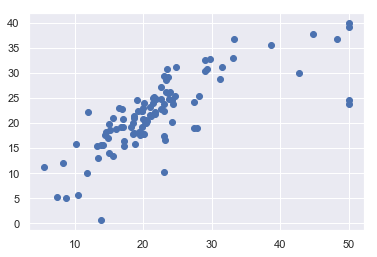

In [65]:
plt.scatter(y_test,y_predict)

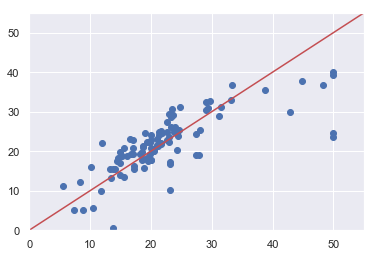

In [66]:
plt.scatter(y_test,y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'r')

In [68]:
x_train[87]

array([  5.58107,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.436  ,
        87.9    ,   2.3158 ,  24.     , 666.     ,  20.2    , 100.19   ,
        16.22   ])

In [70]:
correlation_matrix = boston.corr().round(2)

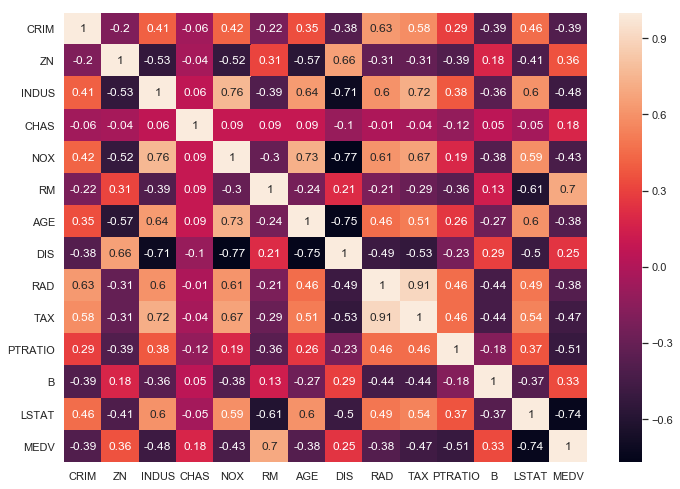

In [72]:
#放大圖
sns.set(rc={'figure.figsize':(11.7,8.27)})
#把相關係數畫出來(annot上面數值顯示)
sns.heatmap(correlation_matrix,annot=True)